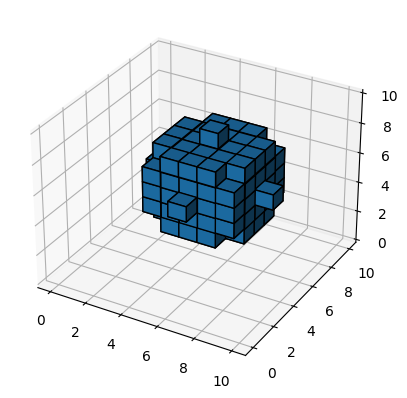

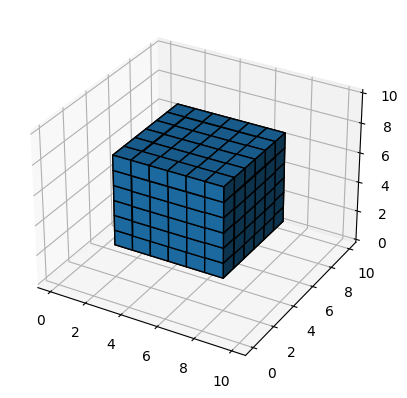

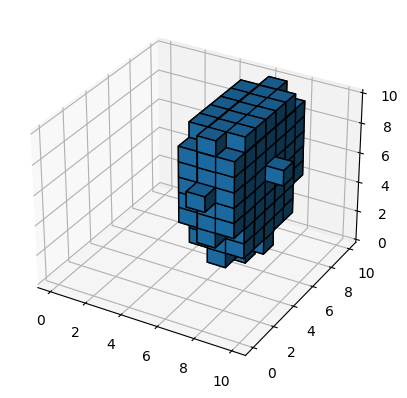

C:\Users\Ada\AppData\Local\Temp\ipykernel_32092\675258319.py:22: RuntimeWarning: invalid value encountered in sqrt
  distance_to_ring = np.sqrt(distance_to_center**2 - (major_radius - distance_to_center)**2)


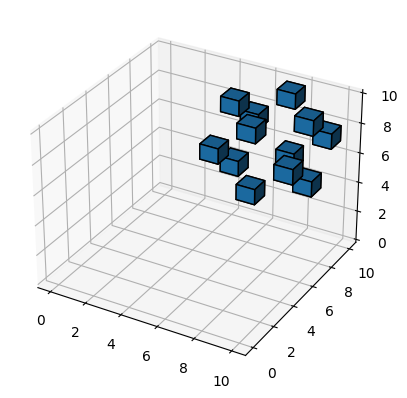

In [2]:
import numpy as np
#creat 3d plot
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import numpy as np

def create_cube_track(arr, corner1, corner2):
    arr[corner1[0]:corner2[0]+1, corner1[1]:corner2[1]+1, corner1[2]:corner2[2]+1] = 1.0

def create_ellipsoid_track(arr, center, radii):
    x, y, z = np.indices(arr.shape)
    scaled_x = (x - center[0]) / radii[0]
    scaled_y = (y - center[1]) / radii[1]
    scaled_z = (z - center[2]) / radii[2]
    distance = scaled_x**2 + scaled_y**2 + scaled_z**2
    arr[distance <= 1.0] = 1.0

def create_torus_track(arr, center, major_radius, minor_radius):
    x, y, z = np.indices(arr.shape)
    distance_to_center = np.sqrt((x - center[0])**2 + (y - center[1])**2 + (z - center[2])**2)
    distance_to_ring = np.sqrt(distance_to_center**2 - (major_radius - distance_to_center)**2)
    arr[distance_to_ring <= minor_radius] = 1.0
    
def create_sphere_track(arr, center, radius):
    x, y, z = np.indices(arr.shape)
    distance = np.sqrt((x - center[0])**2 + (y - center[1])**2 + (z - center[2])**2)
    arr[distance <= radius] = 1.0

def create_cylinder_track(arr, point1, point2, radius):
    x, y, z = np.indices(arr.shape)
    v = np.array(point2) - np.array(point1)
    dist = np.linalg.norm(np.cross(v, np.array([x, y, z]) - np.array(point1)[:, np.newaxis]), axis=0) / np.linalg.norm(v)
    arr[dist <= radius] = 1.0

# Create a 3D numpy array
shape = (10, 10, 10)

# Example usage
space = np.zeros(shape)
create_sphere_track(space, (5, 5, 5), 3)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d') 
ax.voxels(space, edgecolor='k')
plt.show()
"""
space = np.zeros(shape)
create_cylinder_track(space, (2, 2, 2), (8, 8, 8), 1.5)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d') 
ax.voxels(space, edgecolor='k')
plt.show()
"""
space = np.zeros(shape)
create_cube_track(space, (2, 2, 2), (7, 7, 7))
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d') 
ax.voxels(space, edgecolor='k')
plt.show()

space = np.zeros(shape)
create_ellipsoid_track(space, (6, 6, 6), (2, 4, 6))
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d') 
ax.voxels(space, edgecolor='k')
plt.show()

space = np.zeros(shape)
create_torus_track(space, (7, 7, 7), 5, 2)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d') 
ax.voxels(space, edgecolor='k')
plt.show()




In [3]:


# Create a 3D numpy array
shape = (15, 15, 15)


# Example usage



In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def create_reflective_line_track(array, start, end, value=1.0):
    direction = end - start
    distance = np.linalg.norm(direction)
    normalized_direction = direction / distance

    position = start.astype(float)  # Use floating-point coordinates
    for i in range(int(distance) + 1):
        rounded_position = np.round(position).astype(int)
        if np.any(rounded_position < 0) or np.any(rounded_position >= array.shape):
            break
        array[tuple(rounded_position)] = value

        position += normalized_direction

        # Reflect at edges
        for dim in range(3):
            if rounded_position[dim] < 0 or rounded_position[dim] >= array.shape[dim]:
                normalized_direction[dim] *= -1

# Define the dimensions of the 3D space
space_shape = (10, 10, 10)
space = np.zeros(space_shape)

# Generate random start and end points for line tracks
num_tracks = 5
np.random.seed(42)
for _ in range(num_tracks):
    start = np.random.randint(0, space_shape, size=3)
    end = np.random.randint(0, space_shape, size=3)
    create_reflective_line_track(space, start, end)

# Display the result using matplotlib
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(space[0],space[1], space[2])
plt.show()


ValueError: operands could not be broadcast together with remapped shapes [original->remapped]: (100,)  and requested shape (10,)

Error in callback <function _draw_all_if_interactive at 0x000001B3880EDAB0> (for post_execute):


AttributeError: 'Line3D' object has no attribute '_verts3d'

AttributeError: 'Line3D' object has no attribute '_verts3d'

<Figure size 640x480 with 1 Axes>

In [5]:

shape = (10, 10, 10)
space = np.zeros(shape)

# create a circle


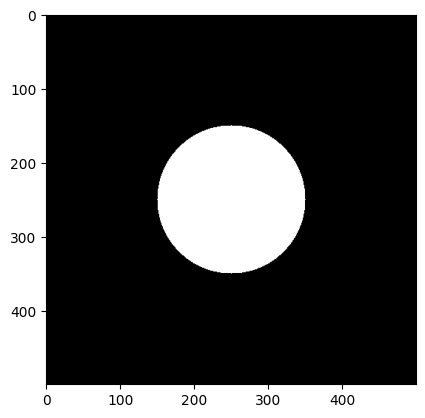

In [8]:
##### RICH DATA GEN #####


import numpy as np
import matplotlib.pyplot as plt

def fill_circle_pixels(array, center_x, center_y, radius, fill_value=1):
    """
    Fill pixels within the circumference of a circle in a NumPy array.
    
    Parameters:
    - array (numpy.ndarray): The input NumPy array.
    - center_x (int): X-coordinate of the center of the circle.
    - center_y (int): Y-coordinate of the center of the circle.
    - radius (int): Radius of the circle.
    - fill_value (optional): Value to fill in the circle region. Default is 1.
    """
    height, width = array.shape
    y, x = np.ogrid[:height, :width]
    mask = (x - center_x)**2 + (y - center_y)**2 <= radius**2
    array[mask] = fill_value

# Create a blank canvas (500x500) with zeros
canvas = np.zeros((500, 500), dtype=int)

# Call the function to fill the circle pixels
fill_circle_pixels(canvas, center_x=250, center_y=250, radius=100)

# Display the result using matplotlib
plt.imshow(canvas, cmap='gray')
plt.show()


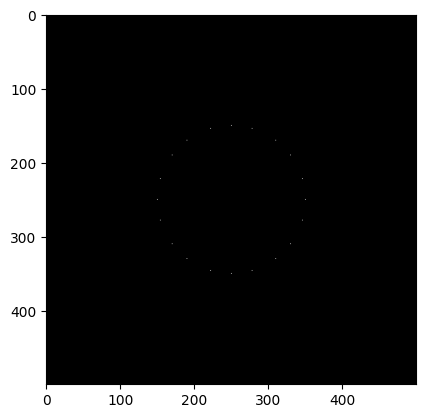

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def fill_circle_circumference(array, center_x, center_y, radius, fill_value=1):
    """
    Fill the circumference of a circle in a NumPy array.
    
    Parameters:
    - array (numpy.ndarray): The input NumPy array.
    - center_x (int): X-coordinate of the center of the circle.
    - center_y (int): Y-coordinate of the center of the circle.
    - radius (int): Radius of the circle.
    - fill_value (optional): Value to fill in the circumference. Default is 1.
    """
    height, width = array.shape
    y, x = np.ogrid[:height, :width]
    distance_squared = (x - center_x)**2 + (y - center_y)**2
    mask = np.isclose(distance_squared, radius**2, rtol=1e-6)
    array[mask] = fill_value

# Create a blank canvas (500x500) with zeros
canvas = np.zeros((500, 500), dtype=int)

# Call the function to fill the circle's circumference
fill_circle_circumference(canvas, center_x=250, center_y=250, radius=100)

# Display the result using matplotlib
plt.imshow(canvas, cmap='gray')
plt.show()


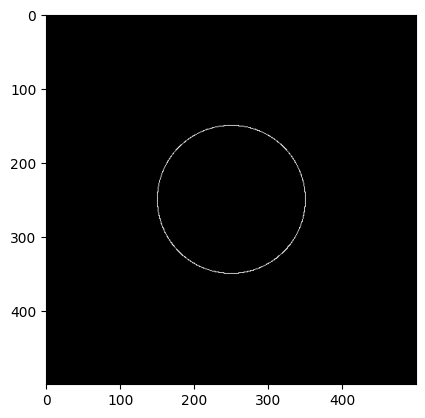

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def fill_circle_circumference(array, center_x, center_y, radius, fill_value=1, angle_step=0.01):
    """
    Fill the circumference of a circle in a NumPy array.
    
    Parameters:
    - array (numpy.ndarray): The input NumPy array.
    - center_x (int): X-coordinate of the center of the circle.
    - center_y (int): Y-coordinate of the center of the circle.
    - radius (int): Radius of the circle.
    - fill_value (optional): Value to fill in the circumference. Default is 1.
    - angle_step (optional): Angle increment for generating circumference points.
                           Smaller values yield more points. Default is 0.01 radians.
    """
    theta = np.arange(0, 2 * np.pi, angle_step)
    x = center_x + radius * np.cos(theta)
    y = center_y + radius * np.sin(theta)
    x = np.round(x).astype(int)
    y = np.round(y).astype(int)
    
    height, width = array.shape
    valid_indices = np.where((x >= 0) & (x < width) & (y >= 0) & (y < height))
    array[y[valid_indices], x[valid_indices]] = fill_value

# Create a blank canvas (500x500) with zeros
canvas = np.zeros((500, 500), dtype=int)

# Call the function to fill the circle's circumference with a smaller step size
fill_circle_circumference(canvas, center_x=250, center_y=250, radius=100, angle_step=0.005)

# Display the result using matplotlib
plt.imshow(canvas, cmap='gray')
plt.show()


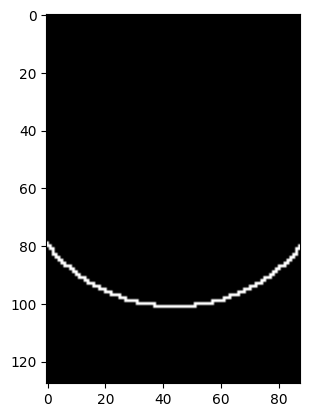

In [105]:
##### TORCH DATA GEN #####


import numpy as np
import matplotlib.pyplot as plt

def fill_circle_circumference(array, origin, radius, fill_value=1, angle_step=0.01, time_dimension=100):
    """
    Fill the circumference of a circle in a NumPy array.
    
    Parameters:
    - array (numpy.ndarray): The input NumPy array.
    - center_x (int): X-coordinate of the center of the circle.
    - center_y (int): Y-coordinate of the center of the circle.
    - radius (int): Radius of the circle.
    - fill_value (optional): Value to fill in the circumference. Default is 1.
    - angle_step (optional): Angle increment for generating circumference points.
                           Smaller values yield more points. Default is 0.01 radians.
    """
    x_dim, y_dim, = array.shape
    t_dim = time_dimension
    if origin == None:
        origin_x = np.randint(0, x_dim-1)
        origin_y = np.randint(0, y_dim-1)
        origin_t = np.randint(0, t_dim-1)

    else:
        origin_x = origin[0]
        origin_y = origin[1]
        origin_t = origin[2]
    
    center_x = origin_x
    center_y = origin_y - radius + 1
    
    #file[origin_y, origin_x] = origin_t

    theta = np.arange(0, 1 * np.pi, angle_step)
    x = center_x + radius * np.cos(theta)
    y = center_y + radius * np.sin(theta)
    x = np.round(x).astype(int)
    y = np.round(y).astype(int)
    
    height, width = array.shape
    valid_indices = np.where((x >= 0) & (x < width) & (y >= 0) & (y < height))
    array[y[valid_indices], x[valid_indices]] = fill_value

    x_parabola_coords = x[valid_indices]
    y_parabola_coords = y[valid_indices]


    #### DUPLICATE COORDINATE REMOVAL ####
    coord_dict = {}
    indices_to_remove = []

    for i, (x_val, y_val) in enumerate(zip(x_parabola_coords, y_parabola_coords)):
        coord = (x_val, y_val)
        if coord in coord_dict:
            indices_to_remove.append(i)
        else:
            coord_dict[coord] = i

    # Remove duplicates
    x_parabola_coords = np.delete(x_parabola_coords, indices_to_remove)
    y_parabola_coords = np.delete(y_parabola_coords, indices_to_remove)


    # Calculate angle at wall impact
    point_l1 = (x_parabola_coords[0], y_parabola_coords[0])
    point_l2 = (x_parabola_coords[1], y_parabola_coords[1])
    angle_l = np.arctan2(point_l2[1] - point_l1[1], point_l2[0] - point_l1[0])

    point_r1 = (x_parabola_coords[-2], y_parabola_coords[-2])
    point_r2 = (x_parabola_coords[-1], y_parabola_coords[-1])
    angle_r = np.arctan2(point_r2[1] - point_r1[1], point_r2[0] - point_r1[0])


    # Create straight lline segments
    



# Create a blank canvas (500x500) with zeros
canvas = np.zeros((128, 88), dtype=int)
origin = (44, 100, 2)
# Call the function to draw the signal
fill_circle_circumference(canvas, origin, radius=56, angle_step=0.0001, time_dimension=100)

# Display the result using matplotlib
plt.imshow(canvas, cmap='gray')
plt.show()


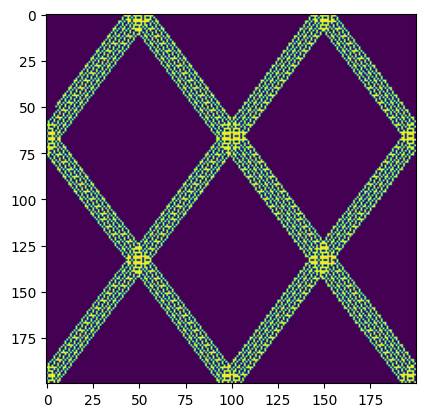

In [131]:
import numpy as np

##### GREAT FUNCTION!!!! RANDOM REFLECTED STRAIGHT LINE WALKER #####

def draw_line(arr, start, angle_degrees, npix):
    # Convert angle to radians
    angle_radians = np.radians(angle_degrees)
    
    # Calculate the direction of the line
    dx = np.cos(angle_radians)
    dy = np.sin(angle_radians)
    
    # Normalize direction vector
    length = np.sqrt(dx**2 + dy**2)
    dx /= length
    dy /= length
    
    # Starting point
    x, y = start
    
    # Counter for the number of lit pixels
    lit_pixels = 0
    
    while lit_pixels < npix:
        x_rounded = int(round(x))
        y_rounded = int(round(y))
        
        # Check if the current coordinates are within the array bounds
        if 0 <= x_rounded < arr.shape[0] and 0 <= y_rounded < arr.shape[1]:
            arr[x_rounded, y_rounded] = 1.0
        
        # Check for reflection off walls
        if x_rounded <= 0 or x_rounded >= arr.shape[0] - 1:
            dx = -dx
        if y_rounded <= 0 or y_rounded >= arr.shape[1] - 1:
            dy = -dy
        
        # Move to the next point along the line
        x += dx
        y += dy

        lit_pixels += 1

# Define array dimensions
width = 200
height = 200

# Create a 2D array of zeros
space = np.zeros((width, height))

# Define starting point, angle in degrees, and number of pixels to be lit
start_point = (50, 5)
angle_deg = 143
num_pixels = 10000

# Call the function to draw the line
draw_line(space, start_point, angle_deg, num_pixels)

# Print the resulting array
plt.imshow(space)


(87, 89) (0, 88) 2.498091544796509 -2.356194490192345


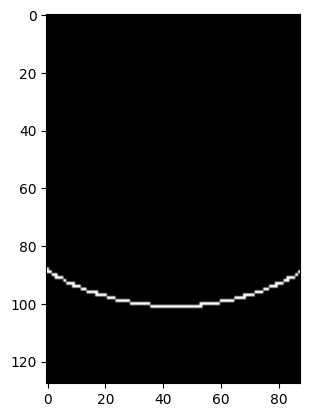

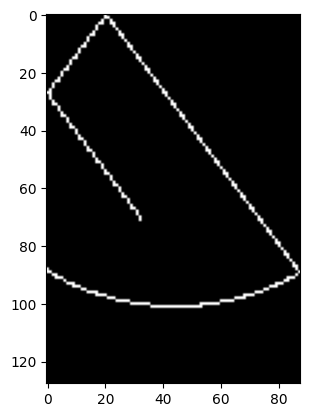

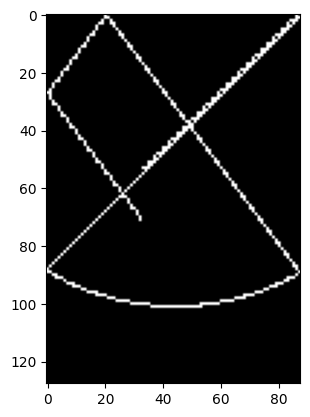

In [176]:
##### TORCH DATA GEN #####   Using realistic reflection angles dosnet give the number of reflections desired 


import numpy as np
import matplotlib.pyplot as plt

def fill_circle_circumference(array, origin, radius, fill_value=1, angle_step=0.01, time_dimension=100):
    """
    Fill the circumference of a circle in a NumPy array.
    
    Parameters:
    - array (numpy.ndarray): The input NumPy array.
    - center_x (int): X-coordinate of the center of the circle.
    - center_y (int): Y-coordinate of the center of the circle.
    - radius (int): Radius of the circle.
    - fill_value (optional): Value to fill in the circumference. Default is 1.
    - angle_step (optional): Angle increment for generating circumference points.
                           Smaller values yield more points. Default is 0.01 radians.
    """
    x_dim, y_dim, = array.shape
    t_dim = time_dimension
    if origin == None:
        origin_x = np.randint(0, x_dim-1)
        origin_y = np.randint(0, y_dim-1)
        origin_t = np.randint(0, t_dim-1)

    else:
        origin_x = origin[0]
        origin_y = origin[1]
        origin_t = origin[2]
    
    center_x = origin_x
    center_y = origin_y - radius + 1
    
    #file[origin_y, origin_x] = origin_t

    theta = np.arange(0, 1 * np.pi, angle_step)
    x = center_x + radius * np.cos(theta)
    y = center_y + radius * np.sin(theta)
    x = np.round(x).astype(int)
    y = np.round(y).astype(int)
    
    height, width = array.shape
    valid_indices = np.where((x >= 0) & (x < width) & (y >= 0) & (y < height))
    

    x_parabola_coords = x[valid_indices]
    y_parabola_coords = y[valid_indices]


    #### DUPLICATE COORDINATE REMOVAL ####
    coord_dict = {}
    indices_to_remove = []

    for i, (x_val, y_val) in enumerate(zip(x_parabola_coords, y_parabola_coords)):
        coord = (x_val, y_val)
        if coord in coord_dict:
            indices_to_remove.append(i)
        else:
            coord_dict[coord] = i

    # Remove duplicates
    x_parabola_coords = np.delete(x_parabola_coords, indices_to_remove)
    y_parabola_coords = np.delete(y_parabola_coords, indices_to_remove)

    # Fill in the parabola
    array[y_parabola_coords, x_parabola_coords] = fill_value
    
    # Calculate angle at wall impact
    point_l1 = (x_parabola_coords[0], y_parabola_coords[0])
    point_l2 = (x_parabola_coords[5], y_parabola_coords[5])
    angle_l = np.arctan2(point_l2[1] - point_l1[1], point_l2[0] - point_l1[0])

    point_r1 = (x_parabola_coords[-6], y_parabola_coords[-6])
    point_r2 = (x_parabola_coords[-1], y_parabola_coords[-1])
    angle_r = np.arctan2(point_r2[1] - point_r1[1], point_r2[0] - point_r1[0])

    
    # Create straight lline segments
    return point_l1, point_r2, angle_l, angle_r


def draw_line(arr, start, angle, npix, use_degrees=False):
    if use_degrees:
        # Convert angle to radians
        angle = np.radians(angle)
        
    # Calculate the direction of the line
    dx = np.cos(angle)
    dy = np.sin(angle)
    
    # Normalize direction vector
    length = np.sqrt(dx**2 + dy**2)
    dx /= length
    dy /= length
    
    # Starting point
    x, y = start
    
    # Counter for the number of lit pixels
    lit_pixels = 0
    
    while lit_pixels < npix:
        x_rounded = int(round(x))
        y_rounded = int(round(y))
        
        # Check if the current coordinates are within the array bounds
        if 0 <= x_rounded < arr.shape[0] and 0 <= y_rounded < arr.shape[1]:
            arr[x_rounded, y_rounded] = 1.0
        
        # Check for reflection off walls
        if x_rounded <= 0 or x_rounded >= arr.shape[0] - 1:
            dx = -dx
        if y_rounded <= 0 or y_rounded >= arr.shape[1] - 1:
            dy = -dy
        
        # Move to the next point along the line
        x += dx
        y += dy

        lit_pixels += 1


# Create a blank canvas (500x500) with zeros
canvas = np.zeros((128, 88), dtype=int)
origin = (44, 100, 2)
# Call the function to draw the signal
sl, sr, al, ar = fill_circle_circumference(canvas, origin, radius=85, angle_step=0.01, time_dimension=100)
print(sl, sr, al, ar)
# Display the result using matplotlib
plt.imshow(canvas, cmap='gray')
plt.show()


# Call the function to draw the lines
draw_line(canvas, start=reversed(sl), angle=al, npix=200)

# Display the result using matplotlib
plt.imshow(canvas, cmap='gray')
plt.show()


draw_line(canvas, start=reversed(sr), angle=ar, npix=200)

# Display the result using matplotlib
plt.imshow(canvas, cmap='gray')
plt.show()


In [275]:
##### TORCH DATA GEN #####   Using realistic reflection angles dosnet give the number of reflections desired 
import numpy as np
import matplotlib.pyplot as plt

def fill_circle_circumference(array, origin, radius, fill_value=1, angle_step=0.01, time_dimension=100):
    """
    Fill the circumference of a circle in a NumPy array.
    
    Parameters:
    - array (numpy.ndarray): The input NumPy array.
    - center_x (int): X-coordinate of the center of the circle.
    - center_y (int): Y-coordinate of the center of the circle.
    - radius (int): Radius of the circle.
    - fill_value (optional): Value to fill in the circumference. Default is 1.
    - angle_step (optional): Angle increment for generating circumference points.
                           Smaller values yield more points. Default is 0.01 radians.
    """
    x_dim, y_dim, = array.shape
    t_dim = time_dimension
    if origin == None:
        origin_x = np.random.randint(36, 53) #np.randint(0, x_dim-1)
        origin_y = np.random.randint(30, 120) #np.randint(0, y_dim-1)
        origin_t = np.random.randint(0, t_dim-1)

    else:
        origin_x = origin[0]
        origin_y = origin[1]
        origin_t = origin[2]
    
    center_x = origin_x
    center_y = origin_y - radius + 1
    
    #file[origin_y, origin_x] = origin_t

    theta = np.arange(0, 1 * np.pi, angle_step)
    x = center_x + radius * np.cos(theta)
    y = center_y + radius * np.sin(theta)
    x = np.round(x).astype(int)
    y = np.round(y).astype(int)
    
    height, width = array.shape
    valid_indices = np.where((x >= 0) & (x < width) & (y >= 0) & (y < height))
    

    x_parabola_coords = x[valid_indices]
    y_parabola_coords = y[valid_indices]


    #### DUPLICATE COORDINATE REMOVAL ####
    coord_dict = {}
    indices_to_remove = []

    for i, (x_val, y_val) in enumerate(zip(x_parabola_coords, y_parabola_coords)):
        coord = (x_val, y_val)
        if coord in coord_dict:
            indices_to_remove.append(i)
        else:
            coord_dict[coord] = i

    # Remove duplicates
    x_parabola_coords = np.delete(x_parabola_coords, indices_to_remove)
    y_parabola_coords = np.delete(y_parabola_coords, indices_to_remove)

    # Fill in the parabola
    array[y_parabola_coords, x_parabola_coords] = fill_value
    
    # Calculate angle at wall impact
    point_l1 = (x_parabola_coords[0], y_parabola_coords[0])
    point_l2 = (x_parabola_coords[5], y_parabola_coords[5])
    angle_l = np.arctan2(point_l2[1] - point_l1[1], point_l2[0] - point_l1[0])

    point_r1 = (x_parabola_coords[-6], y_parabola_coords[-6])
    point_r2 = (x_parabola_coords[-1], y_parabola_coords[-1])
    angle_r = np.arctan2(point_r2[1] - point_r1[1], point_r2[0] - point_r1[0])

    
    # Create straight lline segments
    return point_l1, point_r2, angle_l, angle_r

def draw_line(arr, start, angle, npix, use_degrees=False):
    if use_degrees:
        # Convert angle to radians
        angle = np.radians(angle)
        
    # Calculate the direction of the line
    dx = np.cos(angle)
    dy = np.sin(angle)
    
    # Normalize direction vector
    length = np.sqrt(dx**2 + dy**2)
    dx /= length
    dy /= length
    
    # Starting point
    x, y = start
    
    # Counter for the number of lit pixels
    lit_pixels = 0
    
    while lit_pixels < npix:
        x_rounded = int(round(x))
        y_rounded = int(round(y))
        
        # Check if the current coordinates are within the array bounds
        if 0 <= x_rounded < arr.shape[0] and 0 <= y_rounded < arr.shape[1]:
            arr[x_rounded, y_rounded] = 1.0
        
        # Check for reflection off walls
        if x_rounded <= 0 or x_rounded >= arr.shape[0] - 1:
            break
            #dx = -dx
        if y_rounded <= 0 or y_rounded >= arr.shape[1] - 1:
            
            dy = -dy
        
        # Move to the next point along the line
        x += dx
        y += dy

        lit_pixels += 1

def add_time(arr, t_start, time_dimension):
    """
    #starting at bottom of array and moving up search row indici for first non zero value
    # then change all non zero values in that row to a value of 1.0, leave zero vals as zero
    # then move up to next row and set all non zero values to 2.0, leave zero vals as zero
    # then move up to next row and set all non zero values to 3.0, leave zero vals as zero
    # repeat until the top of the image is reached or the value to be set exceeds to value of time_dimension.
    # if the value to be set exceeds the value of time_dimension, set it to 0.0 instead. If this occurs continue row by row to top of image and set all non zero values to 0.0
    """
    rows, cols = arr.shape

    first_row = None
    for row_idx in range(rows - 1, -1, -1):
        non_zero_indices = np.where(arr[row_idx, :] != 0)[0]
        if non_zero_indices.size > 0:
            if first_row is None:
                first_row = row_idx
            time_value = first_row - row_idx + t_start
            if time_value > time_dimension:
                time_value = 0

            arr[row_idx, non_zero_indices] = time_value

    return arr

def create_track(canvas, origin, time_dimension):

    # Call the function to draw the signal
    radius = np.random.randint(58, 180)
    sl, sr, al, ar = fill_circle_circumference(canvas, origin, radius=radius, angle_step=0.0001, time_dimension=time_dimension)

    # Call the function to draw the lines
    angle = np.random.randint(93, 117)
    draw_line(canvas, start=reversed(sl), angle=angle, npix=400, use_degrees=True)
    draw_line(canvas, start=reversed(sr), angle=-angle, npix=400, use_degrees=True)

    t_start = np.random.randint(1, time_dimension-1)
    add_time(canvas, t_start, time_dimension)

    return canvas


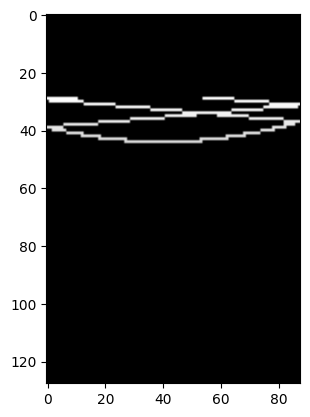

In [276]:
# Create a blank canvas (500x500) with zeros
canvas = np.zeros((128, 88), dtype=int)

origin = None  # origin_x range 36 - 55  # origin_y range 40 - 120  # origin_t range 0 - 99
time_dimension = 100

canvas = create_track(canvas, origin, time_dimension)
# Display the result using matplotlib
plt.imshow(canvas, cmap='gray')
plt.show()